In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import random
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from matplotlib.ticker import StrMethodFormatter

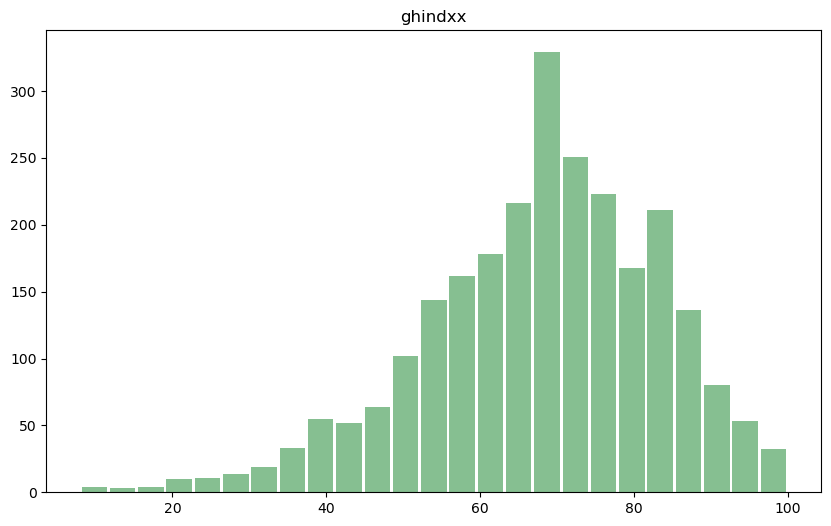

In [45]:
df = pd.read_csv('/Users/liumingqian/anly-501-project-liumingqian0511/data/01-modified-data/rand.csv')
df.drop(columns=['person','catastrophic','free'],inplace=True)
ax = df.hist(column='ghindxx', bins=25, grid=False, figsize=(10,6), color='#86bf91', zorder=2, rwidth=0.9)


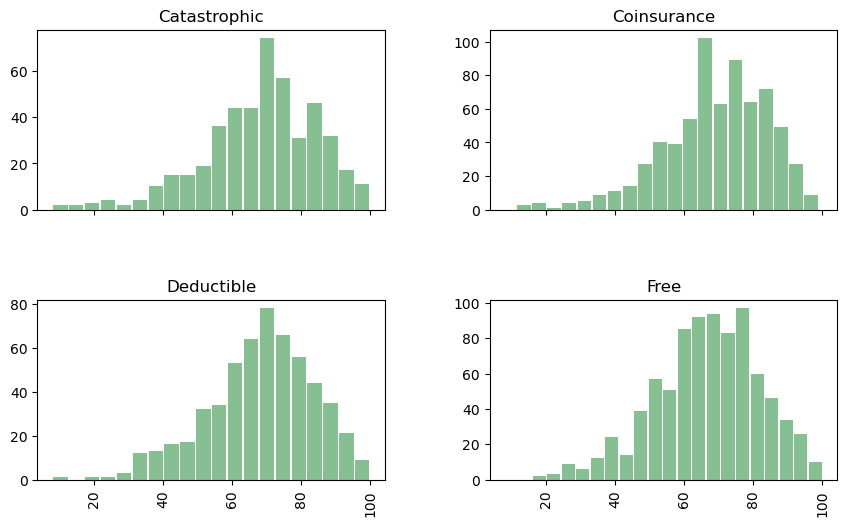

In [43]:
ax = df.hist(column='ghindxx', by='plan_type', bins=20, grid=False, figsize=(10,6), layout=(2,2), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

## Baseline Model

In [57]:
Y = df['ghindxx']
conditions = [
    (df['plan_type'] == 'Free'),
    (df['plan_type'] == 'Coinsurance'),
    (df['plan_type'] == 'Deductible'),
    (df['plan_type'] == 'Catastrophic')
    ]

values = [0,1,2,3]
df['plan'] = np.select(conditions, values)
X = df.drop(columns=['plan_type','plan','ghindxx','face_to_face_visit','outpatient_expenses','totadm','total_expenses','inpdol_inf'])
ux = np.mean(X,axis = 0) # NORMALIZE X
sx = np.std(X,axis = 0)
for i in range(10):
    X.iloc[:,i] = (X.iloc[:,i] - ux[i])/sx[i]
X['plan'] = df['plan']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print("TRAINING SHAPES:",x_train.shape,y_train.shape)
print("TEST SHAPES:",x_test.shape,y_test.shape)

TRAINING SHAPES: (1787, 11) (1787,)
TEST SHAPES: (767, 11) (767,)


In [68]:
def getAbsoluteError(X_t,Y_t, modelInput):
    ypred = modelInput.predict(X_t)
    error = Y_t - ypred
    return np.mean(np.square(error))

/var/folders/0y/czdjt9k17_9fgxmg3d286zjm0000gn/T/ipykernel_35694/2261052130.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex, err, 'rs-', color = 'orange',linewidth = 1.5)
/var/folders/0y/czdjt9k17_9fgxmg3d286zjm0000gn/T/ipykernel_35694/2261052130.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex, errTest, 'rs-', color = 'green', linewidth = 1.5)


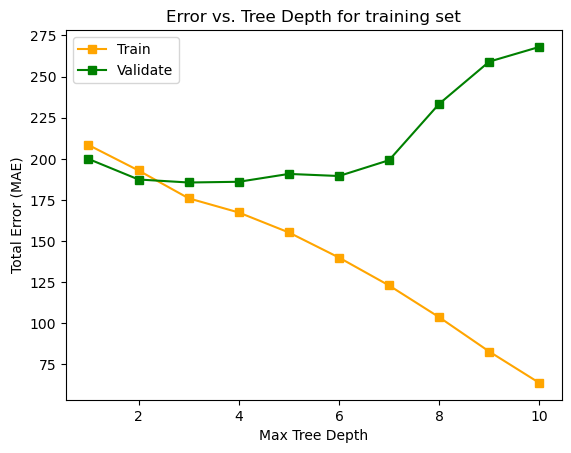

In [69]:
err = []
errIndex = []
errTest = []
for depth in range(1,11):
    model = tree.DecisionTreeRegressor(max_depth=depth)
    model = model.fit(x_train,y_train)
    err.append(getAbsoluteError(x_train, y_train, model))
    errTest.append(getAbsoluteError(x_test, y_test, model))
    errIndex.append(depth)

fig,ax = plt.subplots()
ax.plot(errIndex, err, 'rs-', color = 'orange',linewidth = 1.5)
ax.plot(errIndex, errTest, 'rs-', color = 'green', linewidth = 1.5)
ax.set_xlabel('Max Tree Depth')
ax.set_ylabel('Total Error (MAE)')
ax.set_title('Error vs. Tree Depth for training set')
plt.legend(['Train','Validate'])

/var/folders/0y/czdjt9k17_9fgxmg3d286zjm0000gn/T/ipykernel_35694/827077174.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex, err, 'rs-', color = 'orange',linewidth = 1.5)
/var/folders/0y/czdjt9k17_9fgxmg3d286zjm0000gn/T/ipykernel_35694/827077174.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex, errTest, 'rs-', color = 'green', linewidth = 1.5)


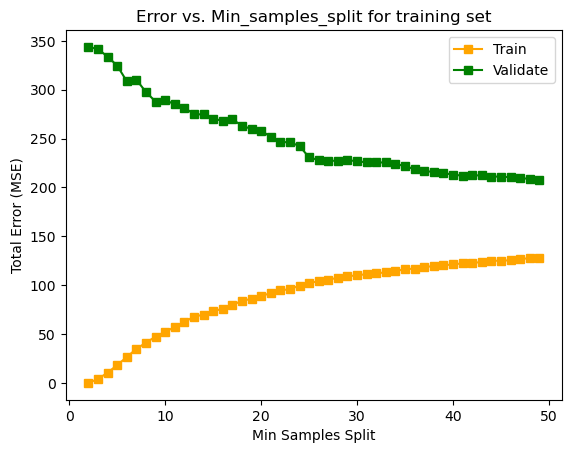

In [77]:
err = []
errIndex = []
errTest = []
for split in range(2,50):
    model = tree.DecisionTreeRegressor(min_samples_split=split)
    model = model.fit(x_train,y_train)
    err.append(getAbsoluteError(x_train, y_train, model))
    errTest.append(getAbsoluteError(x_test, y_test, model))
    errIndex.append(split)

fig,ax = plt.subplots()
ax.plot(errIndex, err, 'rs-', color = 'orange',linewidth = 1.5)
ax.plot(errIndex, errTest, 'rs-', color = 'green', linewidth = 1.5)
ax.set_xlabel('Min Samples Split')
ax.set_ylabel('Mean Square Error (MSE)')
ax.set_title('Error vs. Min_samples_split for training set')
plt.legend(['Train','Validate'])

/var/folders/0y/czdjt9k17_9fgxmg3d286zjm0000gn/T/ipykernel_35694/115619531.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex, err, 'rs-', color = 'orange',linewidth = 1.5)
/var/folders/0y/czdjt9k17_9fgxmg3d286zjm0000gn/T/ipykernel_35694/115619531.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex, errTest, 'rs-', color = 'green', linewidth = 1.5)


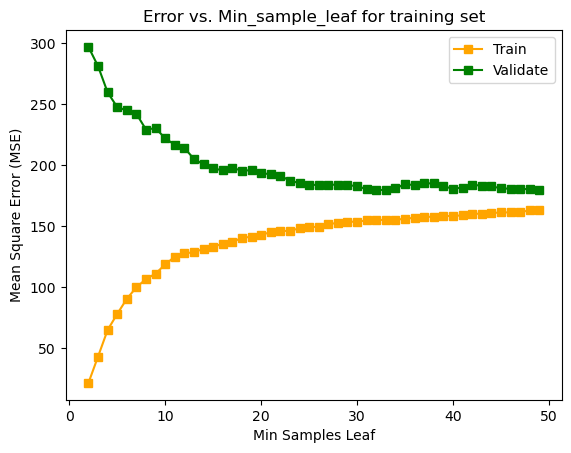

In [85]:
err = []
errIndex = []
errTest = []
for leaf in range(2,50):
    model = tree.DecisionTreeRegressor(min_samples_leaf=leaf)
    model = model.fit(x_train,y_train)
    err.append(getAbsoluteError(x_train, y_train, model))
    errTest.append(getAbsoluteError(x_test, y_test, model))
    errIndex.append(leaf)

fig,ax = plt.subplots()
ax.plot(errIndex, err, 'rs-', color = 'orange',linewidth = 1.5)
ax.plot(errIndex, errTest, 'rs-', color = 'green', linewidth = 1.5)
ax.set_xlabel('Min Samples Leaf')
ax.set_ylabel('Mean Square Error (MSE)')
ax.set_title('Error vs. Min_sample_leaf for training set')
plt.legend(['Train','Validate'])

## Result

In [82]:
err = []
errIndex = []
errTest = []
model = tree.DecisionTreeRegressor(max_depth = 3, min_samples_leaf=30, random_state=909391, min_samples_split=40)
model = model.fit(x_train,y_train)
err.append(getAbsoluteError(x_train, y_train, model))
errTest.append(getAbsoluteError(x_test, y_test, model))

result = pd.DataFrame(err, errTest)
print(result)

                     0
185.608189  175.996994


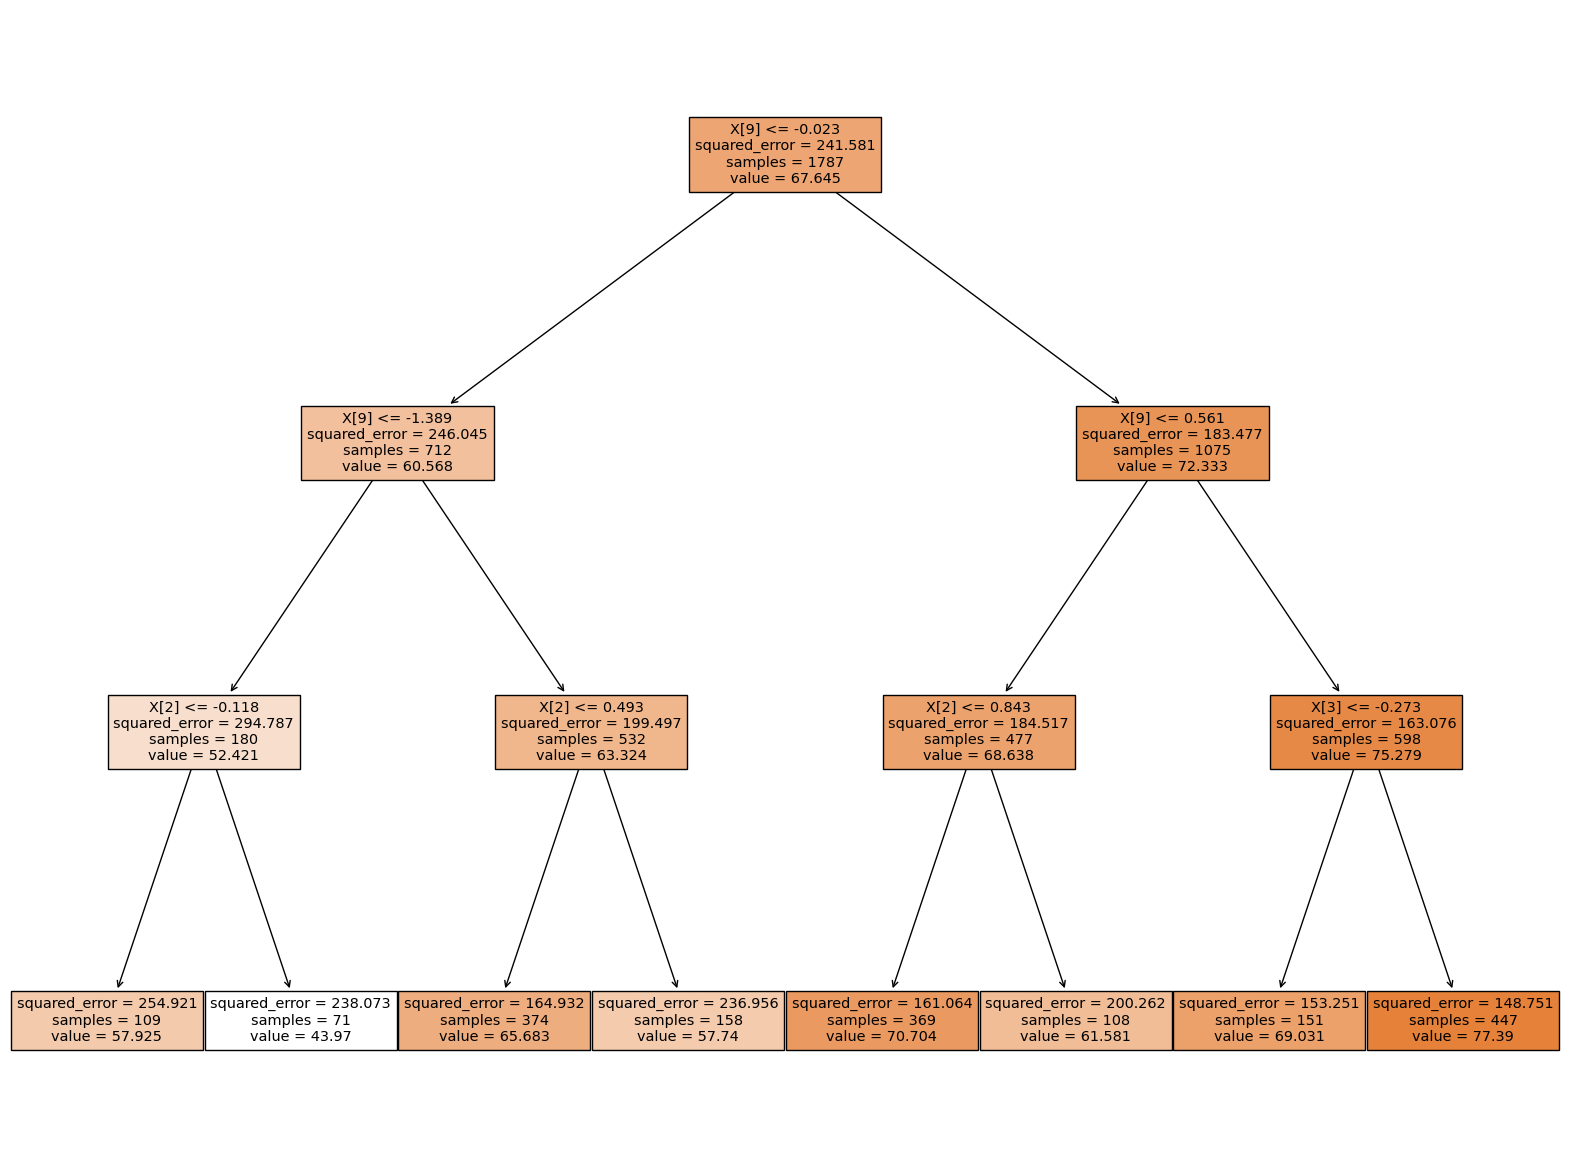

In [84]:
from sklearn import tree
def plot_tree(model):
    fig = plt.figure(figsize=(20,15))
    _ = tree.plot_tree(model, 
                    filled=True)
    plt.show()

plot_tree(model)
